<h1 style="text-align:center">
    Movies
</h1>

<br>

<font color="darkblue">

<h3 style="text-align:center">
    Jacobo Álvarez Gutiérrez
</h3>
    
<h3 style="text-align:center">
    Octubre-Noviembre 2024
</h3>

<hr>

# Introducción

<br>

En este proyecto se desarrolla en Python un análisis básico de datos sobre películas de cine de IMDB.
El set de datos que vamos a usar inicialmente se encuentra en la siguiente página:

https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

En ella puede encontrarse información más detallada, así como una descripción precisa de cada columna.

<br>

Se plantean los apartados iniciales para su resolución *sin usar la librería pandas*. Esto se propone así para forzar a practicar con las técnicas, herramientas y conceptos básicos de Python. Más adelante, hay otros apartados propuestos para su resolución con esta librería y otras.

<br>

<font color="darkblue">
A partir de los datos proporcionados, he conseguido desarrollar cada uno de los retos propuestos en los distintos apartados del Notebook. En mi caso personal, ya contaba con algo de experiencia en este lenguaje de programación y ha sido un reencuentro muy agradable. Además, también he complementado mis conocimientos con herramientas nuevas que considero muy útiles como las listas por comprensión y la metodología MapReduce, lo cual he tratado de implementar en este cuaderno.
    
<br>
<br>

Por otra parte, he agradecido enormemente el apartado creativo para poder curiosear un poco más. Esto me ha permitido indagar en otras librerías desconocidas para mí, ampliando así mi experiencia en la programación con este lenguaje.

<br>

Aunque al final de este notebook detallaré la calificación que calculo honestamente, globalmente, siguiendo las puntuaciones que se asigna a cada apartado, diría que he obtenido una nota de 9 sobre 10. Esto es así puesto que, aunque todas las pruebas de funcionamiento son correctas, estoy seguro de que en algún sitio se podría optimizar un poco la definición de alguna de las funciones, hacerlas más robustas frente al tratamiento de errores, simplificar la escritura de comentarios o docstrings, etc. Es decir, siempre se podría mejorar.
</font>

<br>

# Datos de partida

(**Nota previa:** hasta el apartado específico de dataframes, se deben desarrollar las soluciones a los ejercicios propuestos sin usar la librería `pandas`, justamente para obligar a practicar con conceptos básicos de Python.)

Nuestra tabla de datos es el archivo de texto `movie_data.csv` que se encuentra en la carpeta `data_in`, y puede verse así con cualquier editor:

<br>

<center>
    <img src="./images/texto.png" width="100%">
</center>

La primera fila es la cabecera.
Esta fila cabecera contiene los nombres de los campos, separados por comas.
Yo la he marcado en azul para distinguirla fácilmente de las demás filas, que contienen los datos propiamente dichos,
esto es, los valores de dichos campos, consignando los datos de cada película en cada línea.

Si abrimos esta tabla con *excell* (importar datos csv con el separador `,`), vemos cada dato en una celda.

<br>

<center>
    <img src="./images/csv_1.png" width="100%">
</center>

<br>

Mostramos la hoja excell en dos imágenes por ser muy ancha.

<br>

<center>
    <img src="./images/csv_2.png" width="100%">
</center>

# Librerías y constantes globales

<br>

Pongamos todas las librerías necesarias al principio, tal como propone el estilo `pep-8`. Ej.:
<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>.
    
De paso, en éste y otros lugares de Internet podrás encontrar detalles sobre estilo y presentación de código con un estilo estándar y cuidado. Examina esta página y trata de seguir esas indicaciones.

In [1]:
# Librerías:

import csv
import re
import unicodedata
from collections import defaultdict
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
# Constantes globales:

MOVIES_DATA = './movie_data.csv'

selected_headers = ['movie_title', 'title_year', 'director_name',
                      'actor_1_name', 'language', 'country', 'color',
                      'budget', 'imdb_score', 'movie_imdb_link']

FEW_FIELDS = "algunos_campos.txt"

# Parte A. Ejercicios básicos sin usar `pandas` [2 puntos]

Esta parte inicial debe realizarse sin usar la librería `pandas`. Para practicar con esta librería, se plantean otros apartados más abajo.

### A.1. Exploración inicial básica del archivo de datos

Deseamos cargar el archivo de datos, que tiene un formato `csv`.
En este apartado, te recomiendo fuertemente usar la librería `cvs`,
que deberás importar en la primera celda del script, más arriba, no aquí.
(En los siguientes apartados, ya no mencionaré qué librerías usar
ni recordaré dónde se han de importar.)

Observa también que el test de funcionamiento te da el nombre de la función que deber definir
y algún otro identificador como es, por ejemplo, la constante `MOVIES_DATA`,
que debes definir también más arriba, en la segunda celda de este script.

Finalmente, observando el test, verás que se carga por separado la cabecera y las filas de datos.

In [3]:
def load_full_data(document):
    """
    Description:
    ------------
        Carga los datos del archivo "movie_data.csv" y separa la cabecera de
        los registros.
    Args:
    -----
        document (str): Nombre del archivo csv que se pretende leer.
    Returns:
    --------
        tuple:
            - header (list): Cabecera del documento csv.
            - records (list): Lista donde cada elemento se corresponde con
                              los registros de una fila del archivo csv.
    Preconditions:
    --------------
        - document == './movie_data.csv'.
    """

    assert document == './movie_data.csv', ('El documento %s no es el conjunto '
                                     'de datos esperado. Revisa que no hayas '
                                     'modificado su nombre original.'
                                     % document)

    with open(document, 'r', encoding = 'utf-8') as file:
        reader = csv.reader(file)
        return next(reader), [row for row in reader]

In [4]:
# Test de funcionamiento

full_header, full_list_data = load_full_data(MOVIES_DATA)

print(full_header)
print()
print(full_list_data[0:5])

['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

[['Color', 'James Cameron', '723', '178', '0', '855', 'Joel David Moore', '1000', '760505847', 'Action|Adventure|Fantasy|Sci-Fi', 'CCH Pounder', 'Avatar\xa0', '886204', '4834', 'Wes Studi', '0', 'avatar|future|marine|native|paraplegic', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', '3054', 'English', 'USA', 'PG-13', '237000000', '2009', '936', '7.9', '1.78', '33000'], ['Color', 'Gore Verbinski', '302', '169', '563', '1000', 'Orlando Bloom', '40000', '309404152', 'Action|Adventure|F

Ahora, querríamos ver las posiciones de los identificadores de los campos, dados en la línea cabecera.

In [5]:
list_of_enumerated_headers = list(enumerate(full_header))

In [6]:
# Test de funcionamiento

print(list_of_enumerated_headers)

[(0, 'color'), (1, 'director_name'), (2, 'num_critic_for_reviews'), (3, 'duration'), (4, 'director_facebook_likes'), (5, 'actor_3_facebook_likes'), (6, 'actor_2_name'), (7, 'actor_1_facebook_likes'), (8, 'gross'), (9, 'genres'), (10, 'actor_1_name'), (11, 'movie_title'), (12, 'num_voted_users'), (13, 'cast_total_facebook_likes'), (14, 'actor_3_name'), (15, 'facenumber_in_poster'), (16, 'plot_keywords'), (17, 'movie_imdb_link'), (18, 'num_user_for_reviews'), (19, 'language'), (20, 'country'), (21, 'content_rating'), (22, 'budget'), (23, 'title_year'), (24, 'actor_2_facebook_likes'), (25, 'imdb_score'), (26, 'aspect_ratio'), (27, 'movie_facebook_likes')]


### A.2. Campos principales de una película

Los campos (columnas) del archivo son demasiados. No nos interesan todos ellos. Dada una lista con todos los campos, se pide extraer otra lista sólo con los campos con los que vamos a trabajar en los siguientes apartados: `movie_title`, `title_year`, `director_name`, `actor_1_name`, `language`, `country`, `color`, `budget`, `imdb_score` y `movie_imdb_link`.

In [7]:
def main_data_from_item(full_data):
    """
    Description:
    ------------
        Devuelve solo los datos asociados a ciertos ítems de la cabecera
        predefinidos en una constante global (selected_headers).
    Args:
    -----
        full_data (list): Filas del archivo csv (también para la cabecera).
    Returns:
    --------
        selected_values (list): Lista que contiene solo los valores
                                de los ítems seleccionados.
    Preconditions:
    --------------
        - Los ítems seleccionados deben ser elementos de la cabecera.
    """

    missing_items = [item for item in selected_headers
                     if item not in full_header]

    assert missing_items == [], ('Los ítems ('
                                 + ', '.join(missing_items) 
                                 + ') no son elementos de la cabecera')
     
    selected_indices = [full_header.index(item) for item in selected_headers]
    return [full_data[i] for i in selected_indices]

In [8]:
# Test de funcionamiento

print(main_data_from_item(full_header))

print()

datos_avatar_2009 = main_data_from_item(full_list_data[0])
print(datos_avatar_2009)

print()

datos_star_wars_7 = main_data_from_item(full_list_data[4])
print(datos_star_wars_7)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

['Avatar\xa0', '2009', 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', '237000000', '7.9', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1']

['Star Wars: Episode VII - The Force Awakens\xa0            ', '', 'Doug Walker', 'Doug Walker', '', '', '', '', '7.1', 'http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1']


### A.3. Algunos ajustes en los campos

Observa la anomalía en el string del título de la película. También, queremos tratar algunos campos como numéricos, ya sea enteros (el año y el presupuesto) o reales (la valoración). (Algunos campos numéricos enteros están vacíos en el archivo de datos; para ellos, el valor imputado será `-1`.) Además, en las urls de las películas no necesitaremos el fragmento final, iniciado con `?ref_`.

In [9]:
def datatypes_arranged(register):
    """
    Description:
    ------------
        Corrige imperfecciones en los datos str, procesa los campos vacíos y
        convierte los que puede a enteros y floats.
    Args:
    -----
        register (list): Lista de valores a procesar después de pasar por la
                         función load_main_data. Es decir, solo funciona para
                         las cabeceras seleccionadas.
    Returns:
    --------
        cleaned_values (list): Lista con los valores procesados según su
                               tipología.
    """
    
    cleaned_values = []
    
    # Índice 0: título (str)
    if register[0] == '' or register[0] is None:
        cleaned_values.append('')
    else:
        cleaned_values.append(register[0].replace('\xa0', '').strip())
    
    # Índice 1: año (int)
    if register[1] == '' or register[1] is None:
        cleaned_values.append(-1)
    else:
        cleaned_values.append(int(register[1]))
    
    # Índices 2-6: str
    for i in range(2, 7):
        if register[i] == '' or register[i] is None:
            cleaned_values.append('')
        else:
            cleaned_values.append(register[i].replace('\xa0', '').strip())
    
    # Índice 7: presupuesto (int)
    if register[7] == '' or register[7] is None:
        cleaned_values.append(-1)
    else:
        cleaned_values.append(int(register[7]))
    
    # Índice 8: imdb_score (float)
    if register[8] == '' or register[8] is None:
        cleaned_values.append(-1)
    else:
        cleaned_values.append(float(register[8]))
    
    # Índice 9: URL (str)
    if register[9] == '' or register[9] is None:
        cleaned_values.append('')
    else:
        url = register[9]
        if '?ref_' in url:
            url = url.split('?ref_')[0]
        cleaned_values.append(url.strip())

    return cleaned_values

In [10]:
# Test de funcionamiento

print(datatypes_arranged(datos_avatar_2009))

print(datatypes_arranged(datos_star_wars_7))

['Avatar', 2009, 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
['Star Wars: Episode VII - The Force Awakens', -1, 'Doug Walker', 'Doug Walker', '', '', '', -1, 7.1, 'http://www.imdb.com/title/tt5289954/']


### A.4. Recuperación de alguna información básica

<br>

Diseña funciones para recuperar la siguiente información:

<itemize>
    <li> El conjunto de valores posibles del campo `Color`.
    <li> Los títulos de película de nuestro archivo (limpios de caracteres extraños),
        junto con la cantidad de calificadores (un entero), que contengan la subcadena "Victor".
</itemize>

In [11]:
def set_by(searched_header):
    """
    Description:
    ------------
        Busca todos los posibles valores diferentes para alguno de los ítems
        de la cabecera.
    Args:
    -----
        - serched_header (str): nombre del ítem de la cabecera protagonista
    Returns:
    --------
        - (set): Conjunto con los distintos valores posibles para el ítem
                 escogido de la cabecera.
    Preconditions:
    --------------
        - searched_header in headers
    """

    assert searched_header in full_header, (searched_header
                                        + ' no se corresponde con ninguno '
                                        'de los ítems de la cabecera.')
    
    header_index = full_header.index(searched_header)
    return {row[header_index] for row in full_list_data}

def normalize_string(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                   if unicodedata.category(c) != 'Mn')

def search_titles_and_calificators(searched_str):
    """
    Description:
    ------------
        Busca las películas que contienen una cierta cadena de texto en su
        título (con o sin acentos) y el número de calificaciones.
    Args:
    -----
        - searched_str (str): Cadena de texto que debe aparecer en el título.
    Returns:
    --------
        - (list): Películas cuyo título contiene la cadena de texto deseada
                  y número de calificaciones.        
    """

    title_index = full_header.index('movie_title')
    calif_index = full_header.index('num_critic_for_reviews')
    norm_searched_str = normalize_string(searched_str)

    matching_rows = [(row[title_index], row[calif_index])
                     for row in full_list_data
                     if norm_searched_str.lower() in normalize_string(row[title_index]).lower()]

    return [(title.replace('\xa0', ''), calif) for title, calif in matching_rows]

colores = set_by('color')
pelis_victor = search_titles_and_calificators('victor')

In [12]:
# Test de funcionamiento

print(colores)
print(pelis_victor)

{'', ' Black and White', 'Color'}
[('Victor Frankenstein', '159'), ('Victor Frankenstein', '159'), ('The Young Victoria', '188'), ('Victor Frankenstein', '159'), ('Raising Victor Vargas', '59')]


# B Datos en un diccionario [2 puntos]

### B.1. Carga únicamente de datos que vamos a usar

En lugar de cargar *todos* los datos del archivo, luego generar otro archivo con los datos que nos interesan y luego ajustarlos, es mejor diseñar una función que recorre el archivo de datos y, de cada línea del archivo, *únicamente* retiene la parte que nos interesa, cargando la cabecera por un lado y, por otro, la lista de datos de interés, ajustados como ya hemos dicho.

Cargaremos esta información en un diccionario, cuyas claves serán pares `(título, año)` y cuyos valores se recogen en una lista con el resto de los campos.

Además, los datos de cada película tras la clave `(título, año)` están repetidas en el archivo de datos, con todos los datos idénticos; y lo que es peor: alguna que está repetida, pero con algún dato distinto. En ambos casos, para simplificar, adoptamos el criterio de registrar únicamente la primera aparición de los datos de una misma película y año.

In [13]:
def load_main_data(document):
    """
    Description:
    ------------
        Limpia y organiza la información del archivo .csv en un diccionario.
    Args:
    -----
        - document (str): Nombre del documento.
    Returns:
    --------
        - selected_headers (list): Valores de la cabecera
        - data_dict (dict): Datos de cada fila
    Preconditions:
    --------------
        - document == './movie_data.csv'
    """

    assert document == './movie_data.csv', ('El documento %s no es el conjunto '
                                     'de datos esperado. Revisa que no hayas '
                                     'modificado su nombre original.'
                                     % document)

    data_dict = {}

    with open(document, 'r', encoding = 'utf-8') as file:

        reader = csv.reader(file)

        all_headers = next(reader)

        selected_index = [all_headers.index(header)
                          for header in selected_headers]

        values = [[row[i] for i in selected_index] for row in reader]

    for row in values:

        clean_row = datatypes_arranged(row)

        title = clean_row[0]
        year = clean_row[1]
        other_fields = [clean_row[i] for i in range(2, len(selected_headers))]

        if (title, year) not in data_dict:
            data_dict[(title, year)] = other_fields

    return selected_headers, data_dict

In [14]:
# Test de funcionamiento

main_header, main_dict_data = load_main_data(MOVIES_DATA)


print(main_header)
print()
for title_year, pieces in list(main_dict_data.items())[:5]:
    print(title_year, " -> ", pieces)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

('Avatar', 2009)  ->  ['James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
("Pirates of the Caribbean: At World's End", 2007)  ->  ['Gore Verbinski', 'Johnny Depp', 'English', 'USA', 'Color', 300000000, 7.1, 'http://www.imdb.com/title/tt0449088/']
('Spectre', 2015)  ->  ['Sam Mendes', 'Christoph Waltz', 'English', 'UK', 'Color', 245000000, 6.8, 'http://www.imdb.com/title/tt2379713/']
('The Dark Knight Rises', 2012)  ->  ['Christopher Nolan', 'Tom Hardy', 'English', 'USA', 'Color', 250000000, 8.5, 'http://www.imdb.com/title/tt1345836/']
('Star Wars: Episode VII - The Force Awakens', -1)  ->  ['Doug Walker', 'Doug Walker', '', '', '', -1, 7.1, 'http://www.imdb.com/title/tt5289954/']


Y ahora podemos suprimir la variable `full_list_data`

In [15]:
# Esta celda debe ser completada por el estudiante
del full_list_data

In [16]:
# Test de funcionamiento

try:
    print(full_list_data)
except:
    print('La variable full_list_data está suprimida correctamente')

La variable full_list_data está suprimida correctamente


### B.2. Recuperación de alguna información

Diseña funciones para averiguar la siguiente información:

- ¿Qué títulos de películas han sido dirigidas por "James Cameron" (o por el director que se desee)?

In [17]:
def movies_anno_for_director(dict_data, director):
    """
    Description:
    ------------
        Busca las películas del actor deseado.
    Args:
    -----
        - dict_data (dict): Datos organizados según la función
                            load_main_data().
        - director (str): Nombre completo con acentos (si los hay) del
                          director buscado.
    Returns:
    --------
        - results (list): Lista cuyos elementos son pares (título, año) de
                          cada película dirigida por 'director'.
    Preconditions:
    --------------
        - 'director' debe ser uno de los directores del conjunto de datos.
    """

    directors = {data[0] for data in dict_data.values()}

    assert director in directors, ('No existe ningún registro para ese '
                                   'director (comprueba los acentos).')
    
    
    results = [(title, year) for (title, year), data in dict_data.items()
               if data[0] == director.strip()]
    return results

In [18]:
# Test de funcionamiento

movies_anno_for_director(main_dict_data, "James Cameron")

[('Avatar', 2009),
 ('Titanic', 1997),
 ('Terminator 2: Judgment Day', 1991),
 ('True Lies', 1994),
 ('The Abyss', 1989),
 ('Aliens', 1986),
 ('The Terminator', 1984)]

- ¿Qué directores han dirigido el número máximo de películas?

In [19]:
def directors_max_movies(dict_data):
    """
    Description:
    ------------
        Busca el director con más películas.
    Args:
    -----
        dict_data (dict): Registro de datos resultado de la función
                          load_main_data()
    Returns:
    --------
        tuple:
            - (list): Nombre/s del director que más aparece en el registro
                      de películas.
            - (int): Número de películas registradas con ese director.
    """

    counter = {}

    for data in dict_data.values():
        if data[0] != '':
            director = data[0]
            if director in counter:
                counter[director] += 1
            else:
                counter[director] = 1

    max_count = max(counter.values(), default=0)
    max_directors = [director for director, count in counter.items()
                     if count == max_count]

    return max_directors, max_count

In [20]:
# Test de funcionamiento
print(directors_max_movies(main_dict_data))

(['Steven Spielberg'], 26)


- Para cada año de un intervalo dado de años, ¿cuántas películas se han realizado? Esta información debe recuperrase en un diccionario convencional (no por defecto), y luego debe mostrarse en una lista con los años en orden ascendente..

In [21]:
def years_num_movies(dict_data, year_i, year_f):
    """
    Description:
    ------------
        Busca el número de películas producidas por año para un cierto
        intervalo de tiempo.
    Args:
    -----
        - dict_data (dict): Registro de datos resultado de la función
                            load_main_data().
        - year_i (int): Año inicial del rango de fechas.
        - year_f (int): Año final del rango de fechas.
    Returns:
    --------
        - results (dict): Diccionario con clave el año y valor el número
                          de películas en ese año.
    Preconditions:
    --------------
        - year_i <= year_f   
    """

    assert year_i <= year_f, ('En los inputs debes colocar primero el año '
                              'inicial y luego el final del periodo deseado, '
                              'y no al revés.')
    
    results = defaultdict(int)
    for (title, year), data in dict_data.items():
        if year_i <= year <= year_f:
            results[year] += 1
    return dict(results)

In [22]:
# Test de funcionamiento

num_movies = years_num_movies(main_dict_data, 2000, 2015)

print(num_movies)

{2009: 253, 2007: 198, 2015: 211, 2012: 214, 2010: 225, 2006: 235, 2008: 223, 2013: 231, 2011: 224, 2014: 243, 2005: 216, 2004: 207, 2003: 169, 2001: 183, 2002: 204, 2000: 169}


In [23]:
num_movies_sorted = sorted(num_movies.items())

In [24]:
# Test de funcionamiento

print(num_movies_sorted)

[(2000, 169), (2001, 183), (2002, 204), (2003, 169), (2004, 207), (2005, 216), (2006, 235), (2007, 198), (2008, 223), (2009, 253), (2010, 225), (2011, 224), (2012, 214), (2013, 231), (2014, 243), (2015, 211)]


- Diseña también una operación que, partiendo de nuestro diccionario de los datos principales, almacene en un archivo los datos siguientes de cada película, sin la cabecera: el título, el idioma, el año, el país y el presupuesto. El separador será en este caso el carácter `|`. El archivo usado para el almacenamiento es el siguiente:

    ``` python
    FEW_FIELDS = "algunos_campos.txt"
    ```

In [25]:
def store_file(dict_data, document):
    """
    Description:
    ------------
        Guarda los ítems (título, año, idioma, pais y presupuesto) en un
        documento de texto.
    Args:
    -----
        - dict_data (dict): Registro de datos resultado de la función
                            load_main_data().
        - document (str): Nombre del archivo de texto donde se guardará
                          la información.
    Notes:
    ------
        Esta función no retorna ningún valor. Directamente crea o
        sobrescribe el archivo especificado.
    """
    
    with open(document, 'w') as file:
        for (title, year), data in dict_data.items():
            file.write(f"{title}|{year}|{data[2]}|{data[3]}|{data[5]}\n")

In [26]:
# Test de funciomaniemto

store_file(main_dict_data, FEW_FIELDS)

! dir algunos*.*

print()

with open(FEW_FIELDS) as f:
    for i in range(5):
        print(f.readline())

 El volumen de la unidad C es Windows-SSD
 El n�mero de serie del volumen es: 3ECB-B0E3

 Directorio de c:\Users\jacob\Desktop\alvarez_gutierrez_jacobo

15/12/2025  17:52           210.855 algunos_campos.txt
               1 archivos        210.855 bytes
               0 dirs  197.979.181.056 bytes libres

Avatar|2009|English|USA|237000000

Pirates of the Caribbean: At World's End|2007|English|USA|300000000

Spectre|2015|English|UK|245000000

The Dark Knight Rises|2012|English|USA|250000000

Star Wars: Episode VII - The Force Awakens|-1|||-1



### B.3. Un conteo sencillo con `defaultdict`

Deseamos saber con qué directores y número de veces ha actuado cada actor como actor principal. Se pide realizar este conteo en un `defaultdict` cuyas claves serán nombres de los actores y cuyos valores tendrán la estructura de un `defaultdict`, cuyas claves serán los nombres de los directores y cuyos valores serán los números contabilizados.

In [27]:
def actor_directors(dict_data):
    """
    Description:
    ------------
        Calcula, para cada actor, cuántas veces ha actuado como actor
        principal con cada director.
    
    Args:
    -----
        - dict_data (dict): Registro de datos resultado de la función
                            load_main_data().
        
    Returns:
    --------
        - count (dict): Diccionario con etiquetas "el nombre del actor
                        principal" y valores, otro diccionario con etiquetas
                        "el nombre de los directores" y valores "el número de
                        colaboraciones con dicho actor".
    """
    count = defaultdict(lambda: defaultdict(int))

    for (title, year), data in dict_data.items():
        count[data[1]][data[0]] += 1

    return count

In [28]:
# Test de funcionamiento

num_collaborations = actor_directors(main_dict_data)

print(type(num_collaborations))
key_a, value_a = list(num_collaborations.items())[0]
print(type(key_a), type(value_a))
key_b, value_b = list(value_a.items())[0]
print(type(key_b), type(value_b))

print()

print(num_collaborations)

<class 'collections.defaultdict'>
<class 'str'> <class 'collections.defaultdict'>
<class 'str'> <class 'int'>

defaultdict(<function actor_directors.<locals>.<lambda> at 0x000001C08C5F3BA0>, {'CCH Pounder': defaultdict(<class 'int'>, {'James Cameron': 1, 'Peter Hyams': 1, 'Fred Dekker': 1, 'Ernest R. Dickerson': 1}), 'Johnny Depp': defaultdict(<class 'int'>, {'Gore Verbinski': 5, 'Rob Marshall': 2, 'Tim Burton': 6, 'James Bobin': 1, 'Michael Mann': 1, 'Florian Henckel von Donnersmarck': 1, 'Wally Pfister': 1, 'David Koepp': 2, 'Scott Cooper': 1, 'Albert Hughes': 1, 'Roman Polanski': 1, 'Wes Craven': 1, 'Mike Newell': 1, 'Rand Ravich': 1, 'Ted Demme': 1, 'Robert Rodriguez': 1, 'Marc Forster': 1, 'Jeremy Leven': 1, 'Laurence Dunmore': 1, 'Terry Gilliam': 1, 'Lasse Hallström': 1, 'Oliver Stone': 1, 'Rachel Talalay': 1, 'Kevin Smith': 2}), 'Christoph Waltz': defaultdict(<class 'int'>, {'Sam Mendes': 1, 'David Yates': 1, 'Michel Gondry': 1, 'Tim Burton': 1}), 'Tom Hardy': defaultdict(<class

### B.4. Print seleccionado

Demasiada información. Deseamos imprimir únicamente, para cada actor, las colaboraciones que superen un mínimo, dato entrada. Si un actor no tiene ninguna colaboración que supere dicho mínimo, lógicamente no debe mostrarse.

In [29]:
def actor_director_min(min_value):
    """
    Description:
    ------------
        Busca, para cada actor, el número de colaboraciones con cada
        director, siempre que dichas colaboraciones superen una
        cantidad mínima.
    Args:
    -----
        - min_value (int): Número mínimo de colaboraciones.
    Returns:
    --------
        - results (dict): Diccionario cuyas etiquetas son los nombres de los
                          actores y sus valores listas de pares
                          (director, colaboraciones).
    """
    return {actor: [(director, colab_num) for director, colab_num in colabs.items() 
                     if colab_num >= min_value]
            for actor, colabs in num_collaborations.items()
            if any(colab_num >= min_value for colab_num in colabs.values())}

for actor, colabs in actor_director_min(5).items():
    print(f"{actor} -> {colabs}")

Johnny Depp -> [('Gore Verbinski', 5), ('Tim Burton', 6)]
Leonardo DiCaprio -> [('Martin Scorsese', 5)]
Robert De Niro -> [('Martin Scorsese', 7)]
Bill Murray -> [('Wes Anderson', 5)]
Clint Eastwood -> [('Clint Eastwood', 10)]
Woody Allen -> [('Woody Allen', 10)]


# C. Algunos gráficos sencillos [1 punto]


### C.1 Un modelo de gráfica

Vamos a diseñar un modelo de gráfica sencillo que nos sirva para las siguientes representaciones. Tomará como parámetro una lista de pares $(x, y)$, y opcionalmente los tres rótulos explicativos que necesitamos incluir. Además, queremos que las etiquetas de las abcisas aparezcan inclinadas, para poder luego mostrar intervalos de edad.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

In [30]:
def representar_xxx_yyy(coords_list, parameter_list=None):
    """
    Description:
    ------------
        Representa coordenadas (x,y) en una gráfica y las une con líneas
        rectas.
    Args:
    -----
        - coords_list (list): Lista de pares de coordenadas en la forma
                               [(x0, y,0), (x1, y1), ..., (xn, yn)]
        - parameter_list (list): Lista con los parámetros
                                 ['título', 'ejex', 'ejey'].
                                 (default = None)
    Notes:
    ------
        Esta función no ofrece ningún objeto retornable. En su lugar,
        muestra directamente la representación gráfica.
    """
    
    x_coords, y_coords = zip(*coords_list)

    fig, ax = plt.subplots(figsize = (10, 6))

    ax.plot(x_coords, y_coords)

    if parameter_list:
        if len(parameter_list) >= 0 and parameter_list[0]:
            ax.set_title(parameter_list[0])
        if len(parameter_list) >= 1 and parameter_list[1]:
            ax.set_xlabel(parameter_list[1])
        if len(parameter_list) >= 2 and parameter_list[2]:
            ax.set_ylabel(parameter_list[2])

    plt.xticks(range(x_coords[0], x_coords[-1]+1), rotation=45)
        
    plt.grid()

    plt.show()

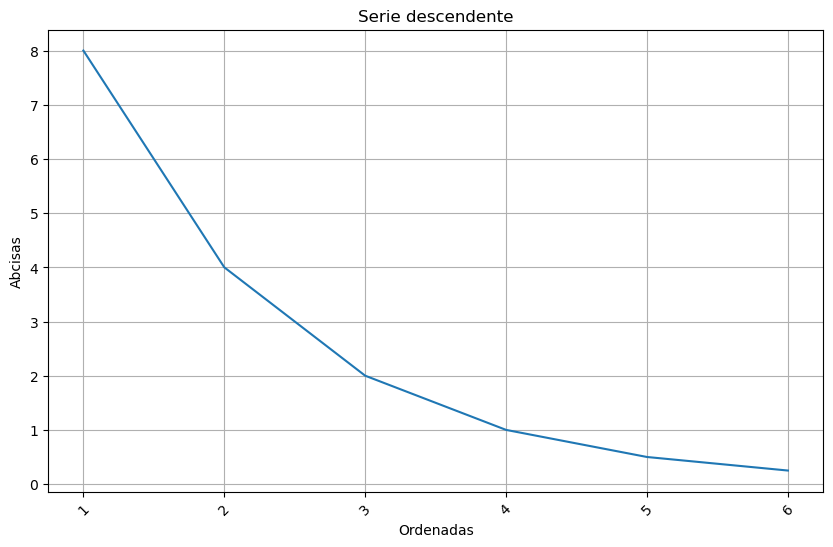

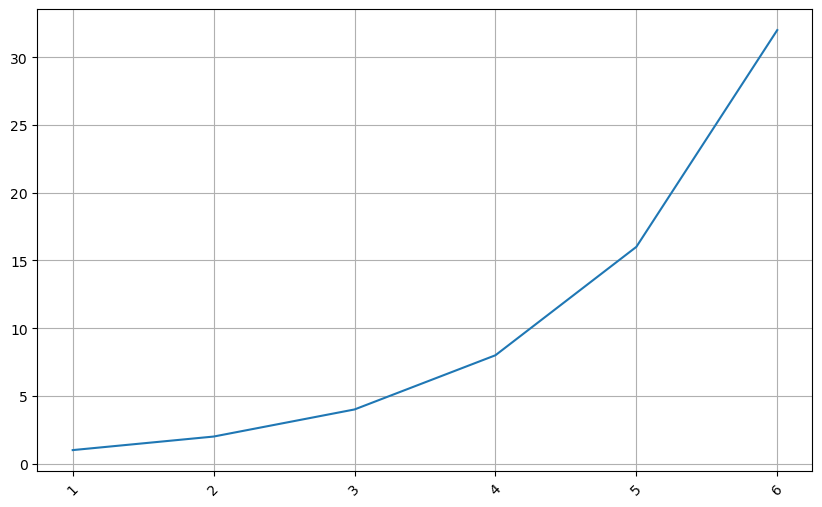

In [31]:
# Pruebas de funcionamiento:

representar_xxx_yyy([(1, 8), (2, 4), (3, 2), (4, 1), (5, 0.5), (6, 0.25)], ["Serie descendente", "Ordenadas", "Abcisas"])

representar_xxx_yyy([(1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32)])

### Una gráfica concreta

Deseamos representar el número de películas de nuestra base de datos que se han producido en un intervalo de años dado.

In [32]:
def repr_movies_years(dict_data, year_i, year_f):
    """
    Description:
    ------------
        Genera un gráfico que representa el número de películas por año
        para un rango de años específico.       
    Args:
    -----
        - dict_data (dict): Registro de datos resultado de la función
                            load_main_data().
        - year_i (int): Año inicial del rango para el cual se desea contar
                        las películas.
        - year_f (int): Año final del rango para el cual se desea contar
                        las películas.        
    Notes:
    ------
        Esta función no ofrece ningún objeto retornable. En su lugar,
        muestra directamente la representación gráfica.
    """
    
    num_movies = years_num_movies(dict_data, year_i, year_f)
    num_movies_sorted = sorted(num_movies.items())

    representar_xxx_yyy(num_movies_sorted,
                        ['Number of movies in our database',
                         'years', 'num. movies in a year'])

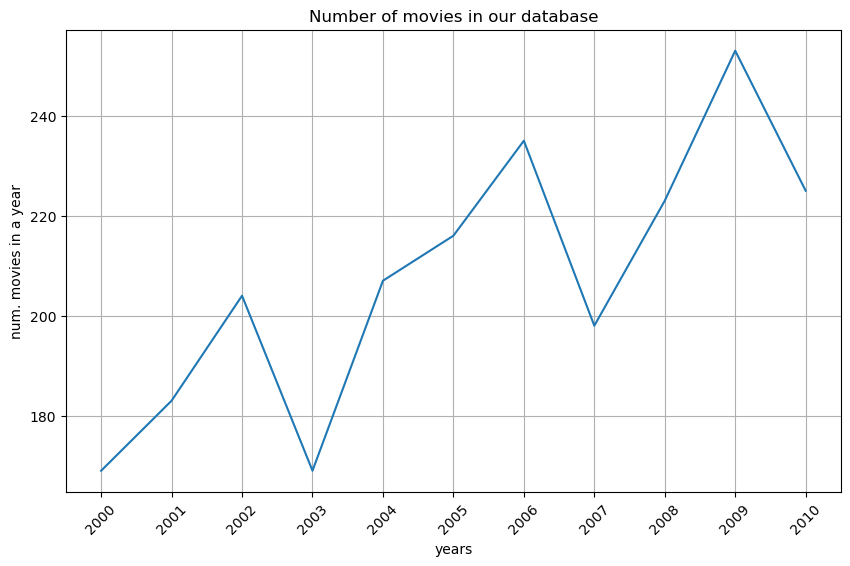

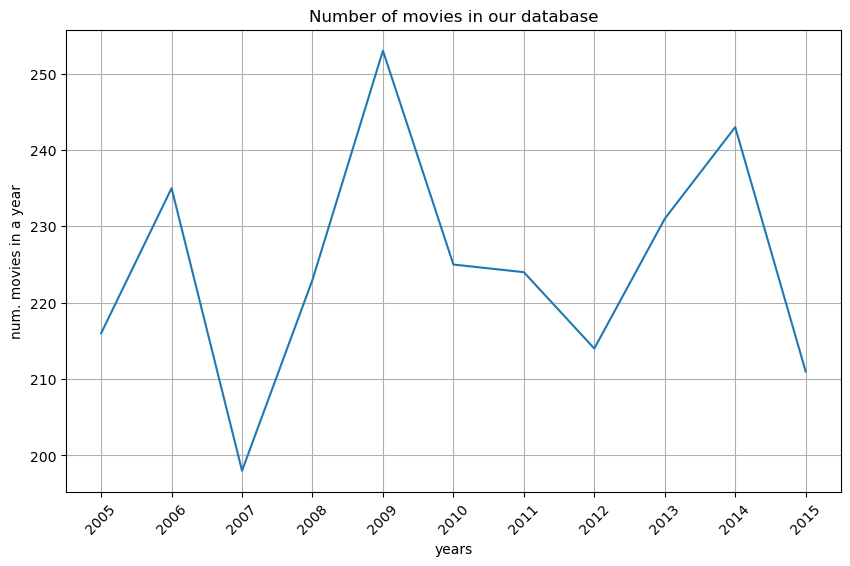

In [33]:
# Test de funcionamiento

repr_movies_years(main_dict_data, 2000, 2010)
repr_movies_years(main_dict_data, 2005, 2015)

# D. Acceso a las urls de imdb y webscraping [2 puntos]

### D.1. Recuperación de las URLs

Con sencillas instrucciones, deseamos recuperar todas las *urls* de las películas de nuestro archivo, mostrando cuántas son, la primera de ellas o las diez primeras por ejemplo:

In [34]:
def links(dict_data):
    """
    Description:
    ------------
        Obtiene los links de enlace a la página IMDB para cada película
        del registro de datos.        
    Args:
    -----
        - dict_data (dict): Registro de datos resultado de la función
                            load_main_data().        
    Returns:
    --------
        - (list): Registro de urls para todas las películas de la base
                  de datos.
    """
    return [data[7] for data in dict_data.values()]

urls = links(main_dict_data)
first_url_movie = urls[0]
first_ten_urls = urls[:10]

In [35]:
# Test de funcionamiento

print(len(urls))

print()

print(first_url_movie)

print()

print(first_ten_urls)

4919

http://www.imdb.com/title/tt0499549/

['http://www.imdb.com/title/tt0499549/', 'http://www.imdb.com/title/tt0449088/', 'http://www.imdb.com/title/tt2379713/', 'http://www.imdb.com/title/tt1345836/', 'http://www.imdb.com/title/tt5289954/', 'http://www.imdb.com/title/tt0401729/', 'http://www.imdb.com/title/tt0413300/', 'http://www.imdb.com/title/tt0398286/', 'http://www.imdb.com/title/tt2395427/', 'http://www.imdb.com/title/tt0417741/']


In [36]:
# Una forma de evitar el error "Requests 403 forbidden" al hacer web scraping en las siguientes celdas:

HEADERS = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Accept-Encoding": "gzip, deflate",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Cache-Control": "max-age=0",
    }

### D.2. Carga de la estructura sintáctica de una URL

Ahora, deseamos extraer el código `html` de una película.

In [37]:
def soup_movie(url):
    """
    Description:
    ------------
        Recupera el archivo html a partir del url de una página web.       
    Args:
    -----
        - url (str): Cadena de texto con el url de acceso a la página web.       
    Returns:
    --------
        - soup (BeautifulSoup): Documento html de la página web.
    """
    try:
        response = requests.get(url, headers= HEADERS)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        return soup

    except requests.exceptions.RequestException as e:
        print(f"Error al obtener el HTML: {e}")
        return None

In [38]:
# Test de funcionamiento

soup = soup_movie(first_url_movie)

print(str(soup)[:1000])
print()
print("... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...")
print()
print(str(soup)[-1000:])

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1765821162341);
        }
    })</script><title>Avatar (2009) - IMDb</title><meta content="Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldaña, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and pr

### D.3. Extracción de algunas piezas de información de una URL

Y ahora, con dicho código, deseamos extraer la siguiente información, referida a la película `first_url_movie`:

- La etiqueta completa del título de la película
- La descripción (sólo el contenido).
- La lista de los actores del *reparto principal*
- La información sobre el presupuesto

In [39]:
# La búsqueda de las etiquetas de cada elemento se ha hecho
# manualmente con el navegador ("Inspeccionar")

def url_obtain_title(soup):
    """
    Description:
    ------------
        Obtiene el título de una película de la base de datos.
    Args:
    -----
        - soup (BeautifulSoup): Archivo html obtenido con la función
                                soup_movie.
    Returns:
    --------
        - title (str): Título de la película.
    """

    try:
        return soup.find('title')

    except:
        print('Título no encontrado')

def url_obtain_description(soup):
    """
    Description:
    ------------
        Obtiene la descripción de una película de la base de datos.   
    Args:
    -----
        - soup (BeautifulSoup): Archivo html obtenido con la función
                                soup_movie.        
    Returns:
    --------
        - description (str): Descripción de la película.
    """
    
    try:
        meta_description = soup.find('meta', attrs={'name': 'description'})
        return meta_description['content'].strip() 

    except:
        ('Descripción no encontrada.')

def url_obtain_actors(soup):
    """
    Description:
    ------------
        Obtiene la lista de actores principales de una película de la base
        de datos.
    Args:
    -----
        - soup (BeautifulSoup): Archivo html obtenido con la función
                                soup_movie.
    Returns:
    --------
        - actors_list (list): Lista con el nombre de los actores principales.
    """
    
    actors = soup.find_all('a', class_='sc-cd7dc4b7-1 kVdWAO')

    if actors:
        actors_list = [actor.text.strip() for actor in actors]
    else:
        actors_list = ['No se encontraron actores']
    return actors_list

def url_obtain_budget(soup):
    """
    Description:
    ------------
        Obtiene el presupuesto de una película de la base de datos.
    Args:
    -----
        - soup (BeautifulSoup): Archivo html obtenido con la función
                                soup_movie.
    Returns:
    --------
        - budget (str): Presupuesto de la película.
    """
    
    budget = 'No se ha encontrado el presupuesto'
    for li in soup.find_all('li'):
        if 'presupuesto' in li.text.lower() or 'budget' in li.text.lower():
            # Busca el <span> dentro de ese <li>
            budget_span = li.find(
                          'span',
                           class_='ipc-metadata-list-item__list-content-item')
            if budget_span:
                budget = budget_span.text.strip()
                return budget
            break

print(url_obtain_title(soup))
print()
print(url_obtain_description(soup))
print()
print(url_obtain_actors(soup))
print()
print(url_obtain_budget(soup))

<title>Avatar (2009) - IMDb</title>

Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldaña, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.

['No se encontraron actores']

$237,000,000 (estimated)


### D.4. Actores que intervienen en una lista de URLs

Necesitamos crear un archivo con los actores del reparto principal de las películas de IMDB, dada la lista de sus URLs.

In [40]:
def gather_actors(file_name, urls):
    """
    Description:
    ------------
        Se escribe un documento de texto con los nombres de todos los actores
        del reparto principal de las películas elegidas de la base de datos.       
    Args:
    -----
        - file_name (str): Nombre del archivo de texto que se va a generar
                           o sobreescribir.
        - urls (list): Lista con los urls de las películas seleccionadas de
                       la base de datos.        
    Notes:
    ------
        Esta función no ofrece un objeto retornable. En su lugar, genera o
        sobreescribe directamente el archivo de texto.
    """
    
    try:
        with open(file_name, 'w', encoding='latin1') as f:
            for url in urls:

                soup = soup_movie(url)

                actors_list = url_obtain_actors(soup)

                for actor in actors_list:
                    f.write(f'{actor}\n')
    
    except Exception as e:
        print('Se ha producido un error:')
        print(e)

In [41]:
# Test de funcionamiento

# OJO: esta operación puede llevar bastante tiempo.
# Para esta prueba, usamos un número limitado de películas.

gather_actors("actors_3_first_movies.txt", urls[:3])

!type actors_3_first_movies.txt

No se encontraron actores
No se encontraron actores
No se encontraron actores


In [42]:
# La siguente llamada llevaría un tiempo realmente largo:

# import time # para cronometrar esta función, que tarda mucho

# reloj_inicio = time.time()
# gather_actors("actors_all_movies.txt", urls)
# reloj_fin = time.time()

# print("Tiempo invertido: %s segundos." % (reloj_fin - reloj_inicio))

# E. Pandas [2 puntos]

### E.1. El primer paso es la carga del archivo en un dataframe

In [43]:
def load_dataframe(file_name):
    """
    Description:
    ------------
        Carga toda la información del archivo csv en un dataframe.    
    Args:
    -----
        - file_name (str): Nombre del archivo csv.
    Returns:
    --------
        - (DataFrame): DataFrame de la librería Pandas con la información
                       del archivo csv.
    """
    
    try:
        full_headers, full_list_data = load_full_data(file_name)
        full_clean_data = [[item if item != '' else np.nan for item in row]
                           for row in full_list_data]

        return pd.DataFrame(full_clean_data, columns = full_headers)
    
    except Exception as e:
        print('Se ha producido un error:')
        print(e)

In [44]:
# Test de funcionamiento

tabla_completa = load_dataframe(MOVIES_DATA)

tabla_completa

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131,NaN,Rob Walker,131,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1,87,2,318,Daphne Zuniga,637,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,2013,470,7.7,NaN,84
5039,Color,NaN,43,43,NaN,319,Valorie Curry,841,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593,7.5,16.0,32000
5040,Color,Benjamin Roberds,13,76,0,0,Maxwell Moody,0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400,2013,0,6.3,NaN,16
5041,Color,Daniel Hsia,14,100,0,489,Daniel Henney,946,10443,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,2012,719,6.3,2.35,660


### E.2. Tabla de los campos principales

A pertir de la tabla anterior, construimos otra con sólo algumos de los campos:

In [45]:
def fields_selected_dataframe(dataframe):
    """
    Description:
    ------------
        Recupera solo algunas columnas del dataframe obtenido en la
        celda anterior.
    Args:
    -----
        - dataframe (DataFrame): Imagen del archivo .csv inicial a través
                                 de la función load_dataframe().
    Returns:
    --------
        -(Dataframe): Otro dataframe con solo algunas columnas.
    """   

    # Cabeceras seleccionadas
    selected_items = ['movie_title', 'color', 'director_name', 'language',
                      'country', 'actor_1_name', 'movie_imdb_link']
    return dataframe[selected_items].copy()

In [46]:
# test de comprobación

tabla_breve = fields_selected_dataframe(tabla_completa)

tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker,NaN,NaN,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,NaN,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


### E.3. Columnas de una tabla

¿Cuáles son las columnas de nuestrsa `tabla_breve`?

In [47]:
# Esta celda debe ser completada por el estudiante

print(tabla_breve.columns)

Index(['movie_title', 'color', 'director_name', 'language', 'country',
       'actor_1_name', 'movie_imdb_link'],
      dtype='object')


### E.4. Campos missing

Algunos campos muestran un valod `NaN`. Deseamos cambiarlo por una cadena de caracteres: `"Desc"`.

In [48]:
tabla_breve.replace(np.nan, 'Desc', inplace=True)

In [49]:
# Test de comprobación

tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,Desc,Doug Walker,Desc,Desc,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,Desc,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


### E.5. Director $\rightarrow$ películas y número de películas

Función que averigua la lista de títulos de películas de un director dado:

In [50]:
def titulos_de_director_df(dataframe, director):
    """
    Description:
    ------------
        Dado el nombre de un director, se busca la lista de títulos de
        películas asociadas.
    Args:
    -----
        - dataframe (DataFrame): Datos del archivo.csv. Puede ser la tabla
                                 completa o reducida siempre que el título
                                 y el nombre del director sean dos de las
                                 columnas.
    Returns:
    --------
        - films (DataFrame): Conjunto de películas en la base de datos
                             asociadas al director buscado.
    """
    
    films = dataframe[dataframe['director_name'] == director] \
            [['movie_title']].copy()
    
    if films.empty:
        print('Parece que no existe ninguna película en la base de datos '
              'dirigida por "%s".\nRevisa que esté bien escrito el nombre '
              'y el apellido (incluyendo acentos y mayúsculas).' % director)
    return films

In [51]:
# Test de comprobación:

tabla_tits = titulos_de_director_df(tabla_breve, "James Cameron")
tabla_tits

,movie_title
0,Avatar
26,Titanic
288,Terminator 2: Judgment Day
291,True Lies
606,The Abyss
2486,Aliens
3575,The Terminator


In [52]:
list_tits = tabla_tits["movie_title"].to_list()
print(list_tits)

['Avatar\xa0', 'Titanic\xa0', 'Terminator 2: Judgment Day\xa0', 'True Lies\xa0', 'The Abyss\xa0', 'Aliens\xa0', 'The Terminator\xa0']


Deseamos saber qué directores han dirigido el máximo número de películas, junto con ese número de películas.

In [53]:
def directors_max_movies_df(dataframe):
    """
    Description:
    ------------
        Busca el director con más películas en un dataframe.      
    Args:
    -----
        - dataframe (Dataframe): Contenido el archivo .csv. Puede ser la
                                 tabla entera o reducida siempre que contenga
                                 la columna 'director_name'.
    Notes:
    ------
        Esta función no ofrece ningún objeto retornable. En su lugar,
        devuelve directamente por pantalla el nombre del director con más
        películas en la base de datos y el número de estas.   
    """
   
    count = dataframe['director_name'].value_counts()

    if 'Desc' in count:
        count = count.drop('Desc')
        
    max_count = count.max()
    max_directors = count[count == max_count].index.tolist()

    print(f'({max_directors}, {max_count})')

In [54]:
# test de comprobación:

directors_max_movies_df(tabla_breve)

(['Steven Spielberg'], 26)


# Parte F. Un cálculo masivo con map-reduce [0,5 puntos]

En este apartado se ha de realizar un programa aparte, *basado en la técnica de map-reduce*, que calcule, para cada idioma, en qué países en que se han producido películas y la suma de los presupuestos de dichas películas. Cuando el idioma o el país o el presupuesto no se conozcan, no se considerará esta película.

    C:\...> python language_budget_countries.py -q algunos_campos.txt

El programa funcionará necesariamente con la técnica map-reduce, que podemos poner en juego con la librería `mrjob`.

El funcionamiento del mismo se puede activar también desde aquí:

In [55]:
# Hagamos una llamada al programa de consola desde aquí:

! python language_budget_countries.py -q algunos_campos.txt

"Aboriginal"	"[['Australia', 'UK'],86000000]"
"Arabic"	"[['United Arab Emirates', 'France', 'Egypt', 'Turkey'],11225000]"
"Aramaic"	"[['USA'],30000000]"
"Bosnian"	"[['USA'],13000000]"
"Cantonese"	"[['China', 'Hong Kong'],154500000]"
"Chinese"	"[['China'],12000000]"
"Czech"	"[['Czech Republic'],84450000]"
"Danish"	"[['Denmark'],50100000]"
"Dari"	"[['Afghanistan', 'USA'],20046000]"
"Dutch"	"[['Netherlands'],32150000]"
"Dzongkha"	"[['Australia'],1800000]"
"English"	"[['Thailand', 'Aruba', 'Belgium', 'South Africa', 'Nigeria', 'Chile', 'Hungary', 'Iran', 'Switzerland', 'West Germany', 'Kyrgyzstan', 'Italy', 'Spain', 'Czech Republic', 'Brazil', 'Greece', 'Norway', 'Georgia', 'Hong Kong', 'Germany', 'France', 'Philippines', 'Netherlands', 'Japan', 'Iceland', 'Romania', 'Australia', 'New Zealand', 'Ireland', 'UK', 'New Line', 'Panama', 'Bulgaria', 'USA', 'India', 'China', 'Poland', 'South Korea', 'Canada', 'Denmark', 'Bahamas', 'Russia', 'Mexico', 'Libya', 'Peru', 'Official site'],14195487524

In [56]:
# Para que el resultado se almacene en un archivo:

! python language_budget_countries.py -q algunos_campos.txt > language_countries_budgets.txt

La siguiente celda me permite ver tu programa cómodamente desde aquí.

In [57]:
def print_file(filename):
    with open(filename, "r") as f:
        for line in f:
            print(line, end="")
print_file("language_budget_countries.py")    

# -*- coding: utf-8 -*-
"""
PARTE F: Un cálculo masivo con Map-Reduce
"""

from mrjob.job import MRJob

class MRMovieBudget(MRJob):
    
    def mapper(self, _, line):
        
        row = line.split('|')
        
        language = row[2].strip()
        country = row[3].strip()
        
        try:
            budget = float(row[4]) if row[4].strip() else -1
        except ValueError:
            budget = -1
        
        if language and country and budget > 0:
        
            yield language, (country, budget)
        
    def reducer(self, language, values):
        countries = set()
        total_budget = 0.
        
        for country, budget in values:
            countries.add(country)
            total_budget += budget
            
        yield language, f'[{list(countries)},{round(total_budget)}]'
        
if __name__ == '__main__':
    MRMovieBudget.run()    

# Parte G. Un apartado libre [0.5 puntos]

<br>

<font color="darkblue">
A continuación, se pretende diseñar una función que represente, sobre un mapamundi, la cantidad de películas producidas en los distintos países del mundo. Además de representar el número de películas de forma explícita, se espera también basar dicha representación en una escala de colores que facilite la rápida interpretación del gráfico. Esto se hará emplenado las librerías "pandas" (para la lectura de datos) y "plotly.graph_objects" (para la representación geográfica).
</font>

In [64]:
def graf_films_by_country(df_data):
    """
    Description:
    ------------
        Obtiene una representación gráfica interactiva con el número de
        películas producidas por cada país.
    Args:
    -----
        - df_data (DataFrame): Contenido el archivo .csv. Puede ser la tabla
                               entera o reducida siempre que contenga la
                               columna 'country'. 
    Notes:
    ------
        Esta función no ofrece ningún objeto retornable. En su lugar,
        devuelve directamente por pantalla el gráfico en cuestión. 
    """
    
    clean_df = df_data[df_data['country'].notna() &
                           (df_data['country'] != np.nan) &
                           (df_data['country'].str.strip() != '')]
     
    films_by_country = (clean_df.groupby('country')
                        .size().reset_index(name='films_number'))

    films_by_country['films_range'] = pd.cut(
        films_by_country['films_number'],
        bins = [0, 5, 10, 20, 50, 100, 200, 350, 700, 1500, 3000, 5000],
        labels = ['0-5', '6-10', '11-20', '21-50', '51-100', '101-200',
                  '201-350', '351-700', '701-1500', '1501-3000', '3001-5000'])

    custom_colors = {
        '0-5': "lightcoral",
        '6-10': "salmon",
        '11-20': "tomato",
        '21-50': "orangered",
        '51-100': "gold",
        '101-200': "yellowgreen",
        '201-350': "mediumseagreen",
        '351-700': "teal",
        '701-1500': "dodgerblue",
        '1501-3000': "darkblue",
        '3001-5000': "navy"
    }
    
    fig = px.choropleth(
        films_by_country,
        locations = 'country',
        locationmode = 'country names',
        color = 'films_range',
        color_discrete_map = custom_colors,
        labels = {'films_number': 'Number of films'},
        hover_data = {'films_number': True, 'films_range': False})

    fig.update_geos(showcoastlines = True,
                   coastlinecolor = 'Gray',
                   showland = True,
                   landcolor = 'lightgray',
                   showocean = True,
                   oceancolor = 'lightblue')

    fig.update_layout(title = {'text': 'Number of films for each country',
                               'x': 0.5, 'xanchor': 'center'},
                      margin = {'r':0, 't':50, 'l':0, 'b':0},
                      width = 600,
                      height = 300)
    
    fig.show()    

In [59]:
#Test de funcionamiento
graf_films_by_country(tabla_completa)

# Datos personales

<br>

<font color="darkblue">

-   **Apellidos:** Álvarez Gutiérrez
-   **Nombre:** Jacobo
-   **Email:** jacoboalvarezgutierrez@gmail.com
-   **Fecha:** 10/11/2024

<br>

<font color="black">
    
### Ficha de autoevaluación

<br>

<font color="darkblue">

En líneas generales, me he sentido muy cómodo con esta tarea puesto que ya tenía una cierta experiencia con este lenguaje. A pesar de ello, tal y como he comentado al principio, probablemente se podría mejorar la escritura de muchos de los apartados, tanto los comentarios, docstring, etc; como la propia formulación del código en sí. Por otra parte, también es nuevo para mí el formato PEP8, por lo que es probable que, aunque he intentado ser meticuloso en su aplicación, se escape alguna imperfección.

</font>

<br>

<font color="darkblue">
    
|Apartado|Calificación|Comentario|
|-|-|-|
|a)  |2.4  / 2.5  |Completamente resuelto |
|b)  |1.9  / 2.0  |Completamente resuelto |
|c)  |1.4  / 1.5  |Completamente resuelto |
|d)  |0.9 / 1.0  |Completamente resuelto |
|e)  |1.9  / 2.0  |Completamente resuelto |
|f)  |0.4  / 0.5  |Completamente resuelto |
|g)  |0.4  / 0.5  |Completamente resuelto |
|**Total** |**9.3** / 10.0|**Sobresaliente**|
</font>

<br>

<font color="black">
   
### Ayuda recibida y fuentes utilizadas
    
</font>

<br>

<font color="darkblue">

Las fuentes de información, ordenadas de mayor a menor relevancia, que han sido consultadas para realizar este trabajo son las siguientes:

- **Apuntes de mi grado en Física (Universidad de La Laguna)**
- **Todo el material suministrado para este módulo en el campus virtual**
- **ChatGPT**: Numerosas consultas a esta IA. Principalmente aspectos de formato, de reordenación para hacer el código más óptimo y para ayudarme con el formato PEP8. También fue de gran ayuda en el apartado de elección libre.
- **Stack Overflow**: Numerosas consultas a este foro. Por ejemplo, la función para eliminar los acentos en el apartado A.4, o la codificación 'latin1' para poder apreciar los acentos de los nombres de los actores en el apartado D.4.
- **help()**: Los propios docstrings de las funciones predefinidas en python o diversas librerías también fueron de ayuda, mayoritariamente en los apartados de expresiones regulares.


</font>

<br>


In [60]:
# Esta celda se ha de respetar: está aquí para comprobar
# el funcionamiento de algunas funciones por parte de tu profesor
